# Novelty Detection using SVM

In this notebook we will apply a One-Class SVM to detect novelty in a dataset

In [25]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
from sklearn import svm
%matplotlib inline

## Data

We manually generate the data using numpy . In particular:
- x_train: represents the training data
- x_test: represents the regular novel observations
- x_anomalies: represents the abnormal novel observations

In [26]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

In [27]:
# Generate novel data
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_anomalies = np.random.uniform(low=-4, high=4, size=(40, 2))

## Exploratory Data Analysis

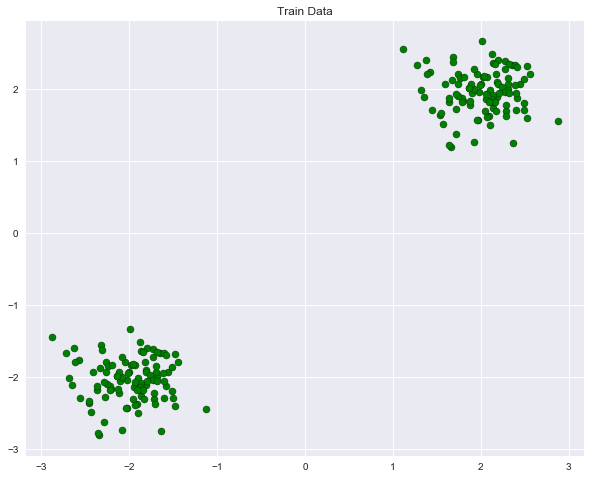

In [28]:
plt.figure(figsize=(10,8))
plt.title('Train Data')
plt.scatter(X_train[:, 0], X_train[:, 1],c='green', s=50, edgecolors='k')

## One Class SVM

We apply a One class SVM on our dataset. It requires the choice of a kernel and a scalar parameter 'gamma' to define a frontier. The RBF kernel is usually chosen although there exists no exact formula or algorithm to set its bandwidth parameter. Finally nu represents an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.

(http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM)

In [29]:
# Fit the model
model = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
model.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [10]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_anom_pred = model.predict(X_anomalies)

In [11]:
# Errors
train_err = y_train_pred[y_train_pred == -1].size
test_err = y_test_pred[y_test_pred == -1].size
anomalies_err = y_anom_pred[y_anom_pred == -1].size 

## Results

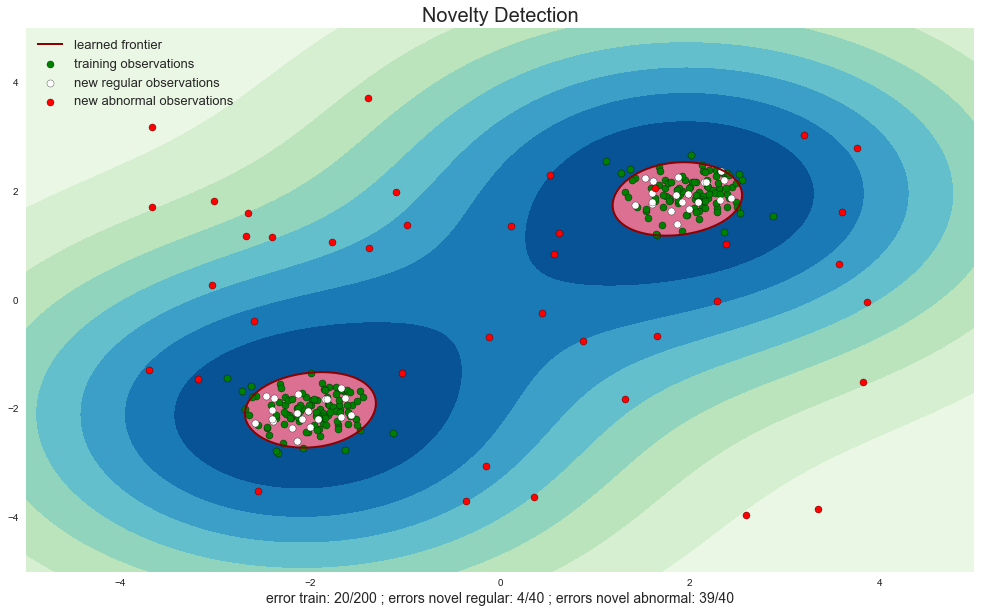

In [30]:
# Plot results
plt.figure(figsize=(17,10))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection",  fontsize=20 )
# Plot the blue levels
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 9), cmap=plt.cm.GnBu)
# Plot the red levels
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# Plot points
train_pts = plt.scatter(X_train[:, 0], X_train[:, 1], c='green', s=50, edgecolors='k')
test_pts = plt.scatter(X_test[:, 0], X_test[:, 1], c='white', s=50, edgecolors='k')
anomalies_pts = plt.scatter(X_anomalies[:, 0], X_anomalies[:, 1], c='red', s=50, edgecolors='k')

# Plot Axis
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("error train: %d/200 ; errors novel regular: %d/40 ; " "errors novel abnormal: %d/40"
           % (train_err, test_err, anomalies_err),  fontsize=14)

# Legend
plt.legend([a.collections[0], train_pts, test_pts, anomalies_pts],["learned frontier", "training observations",
           "new regular observations", "new abnormal observations"],loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=13))